**INFORMATION ABOUT DATASET**

The dataset includes extensive crop production information for India, organised by state and district.

The information spans four key agricultural seasons:
kharif, rabi, summer, and fall, from 1997 to 2023. By analyzing the data, researchers may identify the elements that influence crop yields and output and make informed judgements about how to increase the country's agricultural productivity.

The dataset can be utilized for machine learning and predictive modeling to gain insights and create accurate forecasts regarding crop output across the country. Overall, the dataset has the potential to considerably contribute to the development of India's agricultural industry and alleviate some of its difficulties.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/Crop Production data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB




---


**FINDING MISSING VALUES AND CLEANING**

In [6]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
data.dropna(subset=["Production"],axis=0,inplace=True)

In [9]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64



---


**DESCRIBE UNIQUE VALUES**

In [10]:
data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [11]:
data.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [12]:
print(data.Season.nunique())
print(data.Season.unique())
print(data.Season.max())
print(data.Season.value_counts())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
Winter     
Season
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: count, dtype: int64


In [13]:
print(data.Crop.nunique())
print(data.Crop.unique())
print(data.Crop.max())
print(data.Crop.value_counts().head(20))

124
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Mo

In [14]:
data.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64



---

**Rice has the highest number of production over the other crops.**

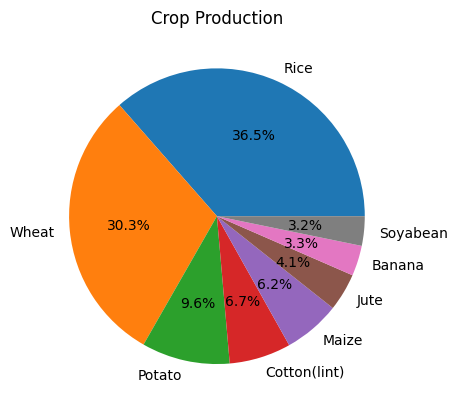

In [19]:
n_data =  data.groupby('Crop')['Production'].sum().reset_index()
sort_p = n_data.sort_values(by='Production', ascending=False)
sort_p
plt_p = sort_p[2:10]
crop_names = plt_p['Crop']
production_values = plt_p['Production']
plt.pie(production_values, labels=crop_names, autopct='%1.1f%%')
plt.title('Crop Production')
plt.show()

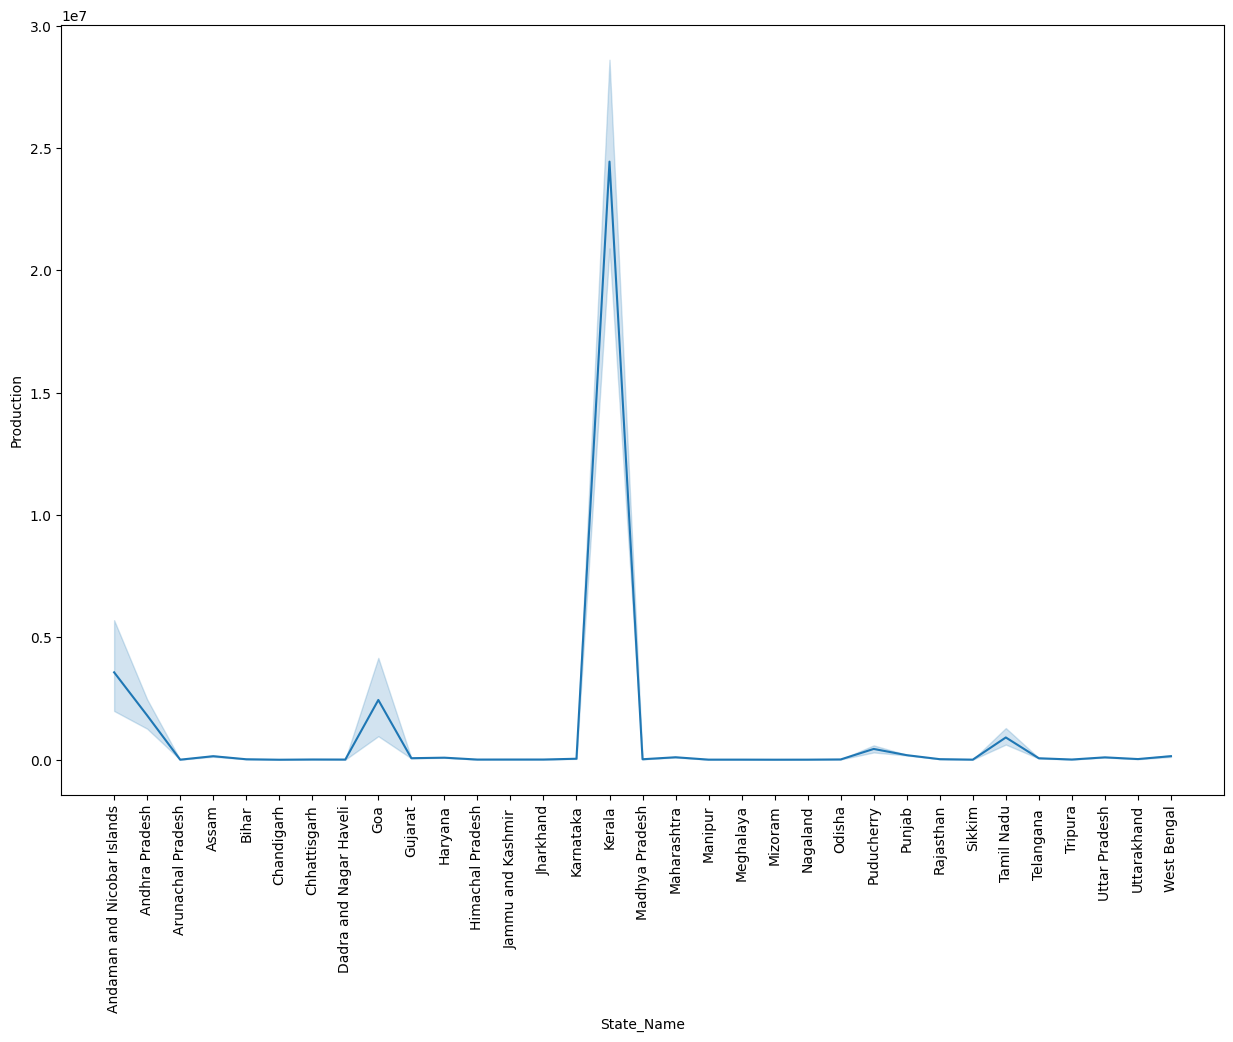

In [44]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x=data['State_Name'], y=data['Production'])
plt.xticks(rotation=90)
plt.show()

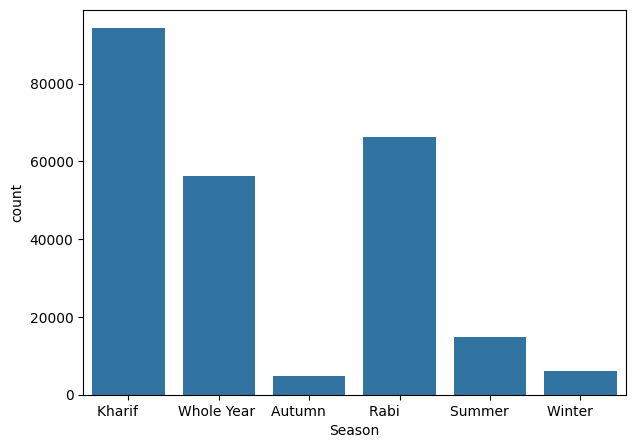

In [38]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=data,x='Season');

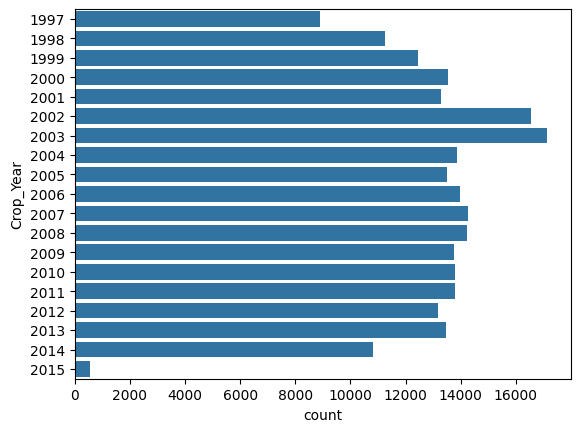

In [39]:
sns.countplot(data=data,y='Crop_Year');

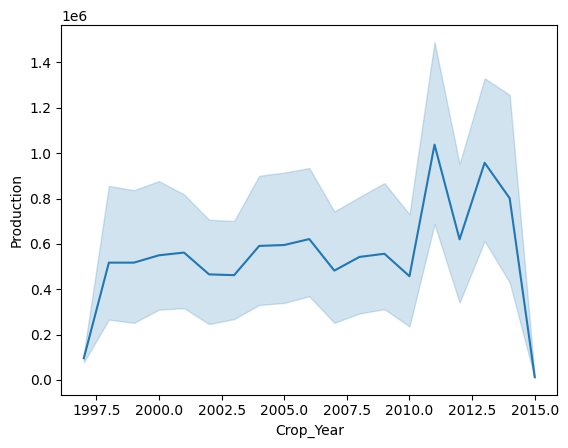

In [40]:
sns.lineplot(data=data,x='Crop_Year',y='Production');

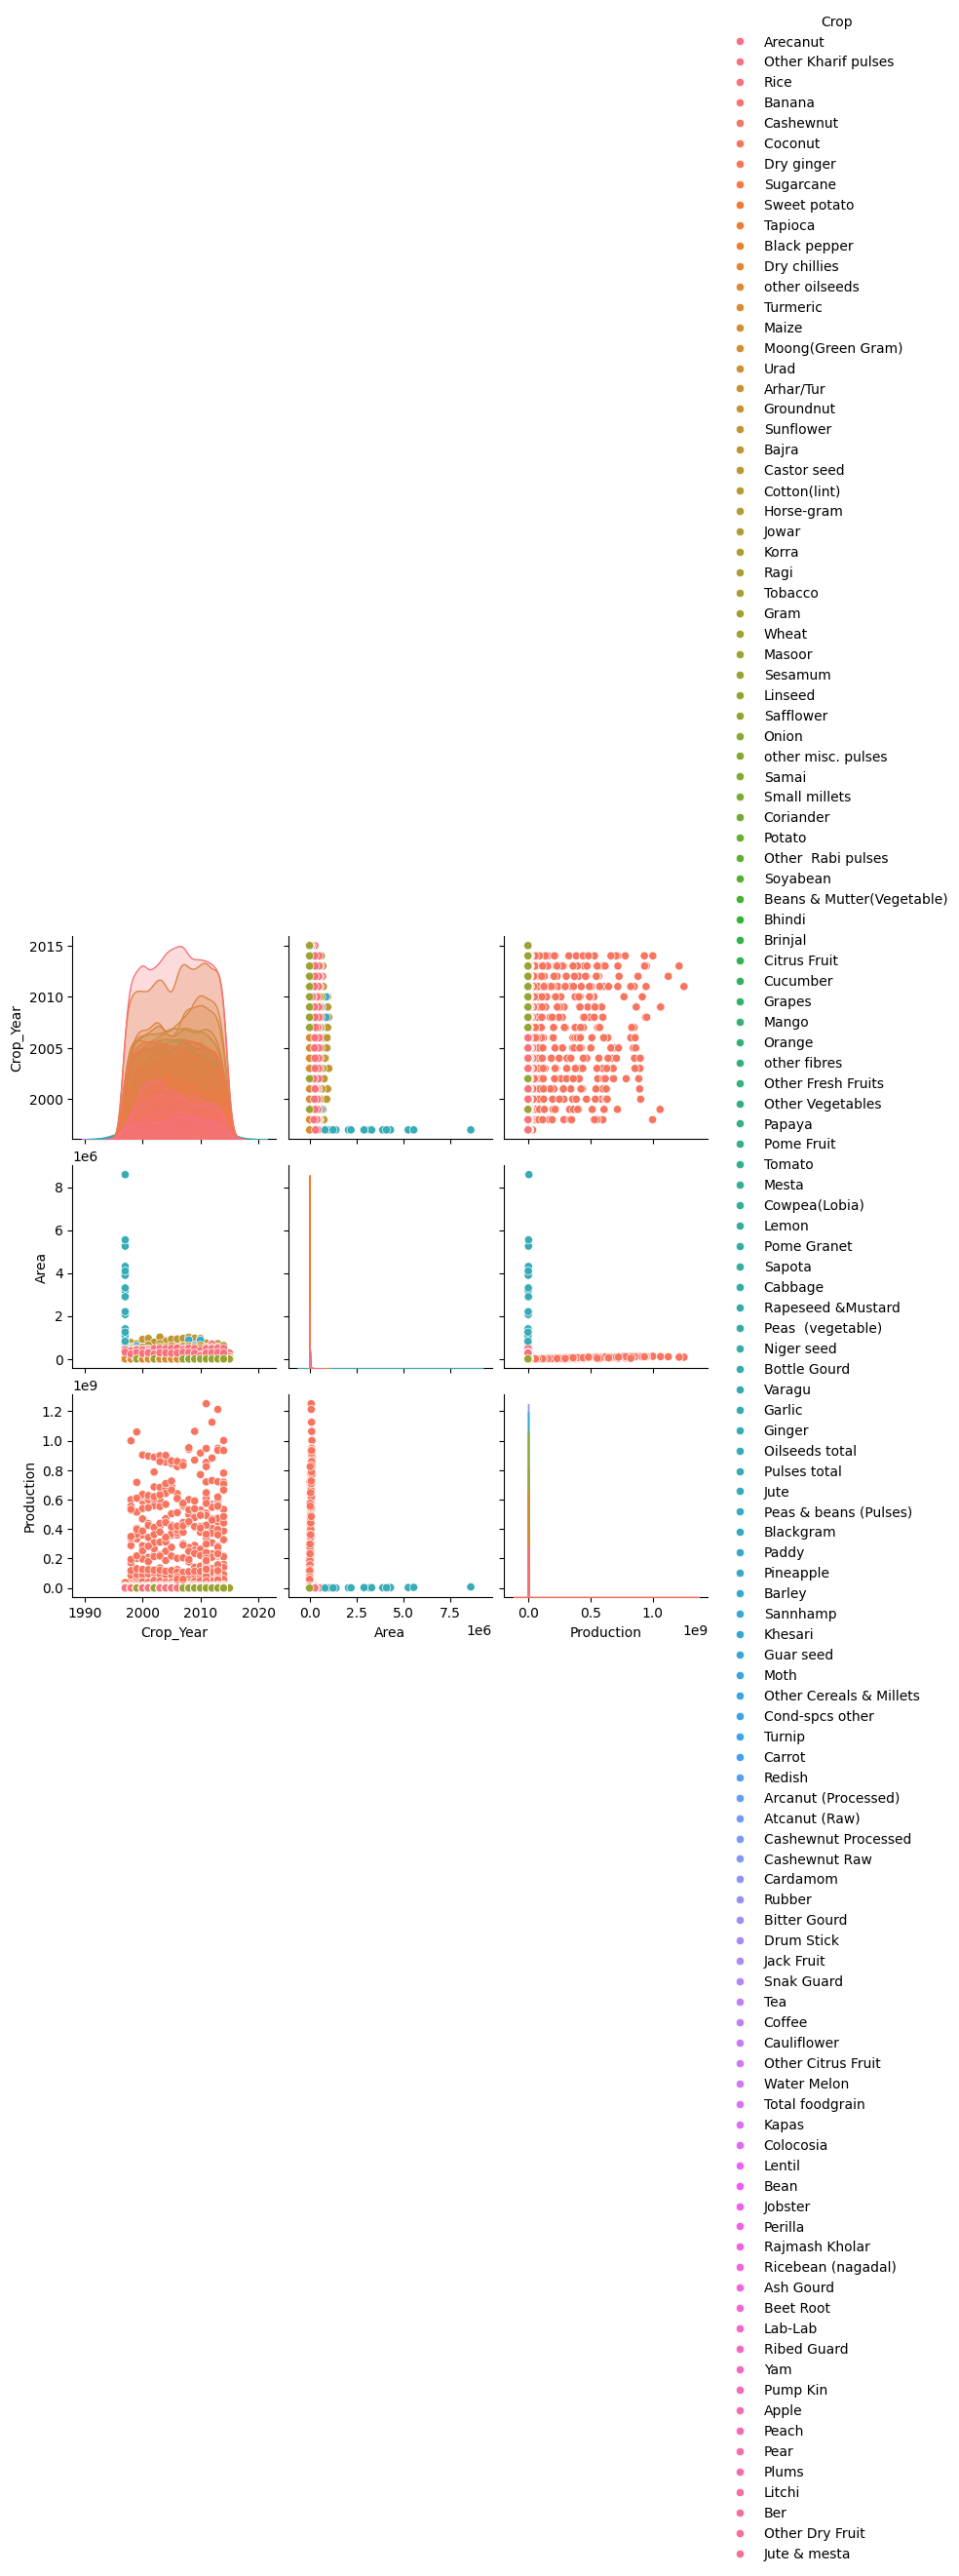

In [56]:
sns.pairplot(data, hue='Crop')

In [52]:
data.groupby(['State_Name','District_Name']).sum().nlargest(15,'Production')

Crop_Year  \
State_Name     District_Name                   
Kerala         KOZHIKODE              509419   
               MALAPPURAM             577581   
               THIRUVANANTHAPURAM     517386   
               THRISSUR               545529   
               KANNUR                 533485   
Andhra Pradesh EAST GODAVARI         1516502   
Kerala         KASARAGOD              591636   
               KOLLAM                 537489   
               PALAKKAD               748136   
               ERNAKULAM              541473   
               ALAPPUZHA              563617   
Andhra Pradesh WEST GODAVARI         1151411   
Kerala         KOTTAYAM               567540   
Tamil Nadu     COIMBATORE            1068497   
Andhra Pradesh SRIKAKULAM            1372127   

                                                                              Season  \
State_Name     District_Name                                                           
Kerala         KOZHIKODE           Whole Year Whole Year Whole Year Whole Year Wh...   
               MALAPPURAM          Whole Year Whole Year Whole Year Whole Year Wh...   
               THIRUVANANTHAPURAM  Whole Year Whole Year Whole Year Whole Year Wh...   
               THRISSUR            Whole Year Whole Year Whole Year Whole Year Wh...   
               KANNUR              Whole Year Whole Year Whole Year Whole Year Wh...   
Andhra Pradesh EAST GODAVARI       Kharif     Kharif     Kharif     Kharif     Kh...   
Kerala         KASARAGOD           Whole Year Whole Year Whole Year Whole Year Wh...   
               KOLLAM              Whole Year Whole Year Whole Year Whole Year Wh...   
               PALAKKAD            Whole Year Whole Year Whole Year Whole Year Wh...   
               ERNAKULAM           Whole Year Whole Year Whole Year Whole Year Wh...   
               ALAPPUZHA           Whole Year Whole Year Whole Year Whole Year Wh...   
Andhra Pradesh WEST GODAVARI       Kharif     Kharif     Kharif     Kharif     Kh...   
Kerala         KOTTAYAM            Whole Year Whole Year Whole Year Whole Year Wh...   
Tamil Nadu     COIMBATORE          Kharif     Kharif     Kharif     Kharif     Kh...   
Andhra Pradesh SRIKAKULAM          Kharif     Kharif     Kharif     Kharif     Kh...   

                                                                                Crop  \
State_Name     District_Name                                                           
Kerala         KOZHIKODE           ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               MALAPPURAM          ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               THIRUVANANTHAPURAM  ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               THRISSUR            ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               KANNUR              ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
Andhra Pradesh EAST GODAVARI       Arhar/TurBajraCotton(lint)Dry chilliesGroundnu...   
Kerala         KASARAGOD           ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               KOLLAM              ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               PALAKKAD            ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               ERNAKULAM           ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               ALAPPUZHA           ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
Andhra Pradesh WEST GODAVARI       Arhar/TurCotton(lint)GroundnutJowarMaizeRiceSe...   
Kerala         KOTTAYAM            ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
Tamil Nadu     COIMBATORE          BananaHorse-gramOnionSesamumSmall milletsTobac...   
Andhra Pradesh SRIKAKULAM          Arhar/TurBajraCotton(lint)GroundnutJowarKorraM...   

                                         Area     Production  
State_Name     District_Name                                  
Kerala         KOZHIKODE           2988170.95 15280739862.95  
               MALAPPURAM          

In [33]:
data.groupby('State_Name').sum()['Production'].nlargest()

State_Name
Kerala           97880045375.70
Andhra Pradesh   17324590296.00
Tamil Nadu       12076443048.93
Uttar Pradesh     3234492662.70
Assam             2111751759.00
Name: Production, dtype: float64

In [37]:
data.groupby("State_Name").sum()['Production'].nsmallest()

State_Name
Chandigarh                 63956.50
Mizoram                  1661539.83
Dadra and Nagar Haveli   1847871.00
Sikkim                   2435735.00
Manipur                  5230917.00
Name: Production, dtype: float64

In [24]:
data.loc[178273 ]

State_Name         Tamil Nadu
District_Name      COIMBATORE
Crop_Year                2011
Season            Whole Year 
Crop                 Coconut 
Area                 82704.00
Production      1250800000.00
Name: 178273, dtype: object



---

**Tamil Nadu has the highest crop production which is observed and thus further analysis of this state is performed**

In [23]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data['Production'].sort_values(ascending = False)

178273   1250800000.00
178331   1212000000.00
100654   1125000000.00
100612   1063000000.00
100149   1059000000.00
              ...     
116116            0.00
111764            0.00
193942            0.00
72705             0.00
66549             0.00
Name: Production, Length: 242361, dtype: float64

In [57]:
TN= data[data['State_Name'] == 'Tamil Nadu']
TN.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
177690,Tamil Nadu,ARIYALUR,2009,Kharif,Rice,25978.00,80462.00
177691,Tamil Nadu,ARIYALUR,2009,Kharif,Small millets,404.00,649.00
177692,Tamil Nadu,ARIYALUR,2009,Whole Year,Arhar/Tur,160.00,122.00
177693,Tamil Nadu,ARIYALUR,2009,Whole Year,Bajra,644.00,1082.00
177694,Tamil Nadu,ARIYALUR,2009,Whole Year,Banana,134.00,5761.00


In [58]:
TN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13266 entries, 177690 to 191214
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     13266 non-null  object 
 1   District_Name  13266 non-null  object 
 2   Crop_Year      13266 non-null  int64  
 3   Season         13266 non-null  object 
 4   Crop           13266 non-null  object 
 5   Area           13266 non-null  float64
 6   Production     13266 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 829.1+ KB


In [59]:
top_p = TN.groupby('Crop').sum()["Production"].reset_index().sort_values(by='Production',ascending=False).nlargest(n=10,columns='Production')
top_p

,Crop,Production
21,Coconut,10937742655.00
70,Sugarcane,847496816.00
64,Rice,100122666.00
5,Banana,58716087.00
73,Tapioca,55648649.00
31,Groundnut,18933400.00
39,Maize,11201656.00
76,Total foodgrain,9121209.00
35,Jowar,4905140.00
23,Cotton(lint),4277078.00


<Axes: xlabel='Production', ylabel='Crop'>

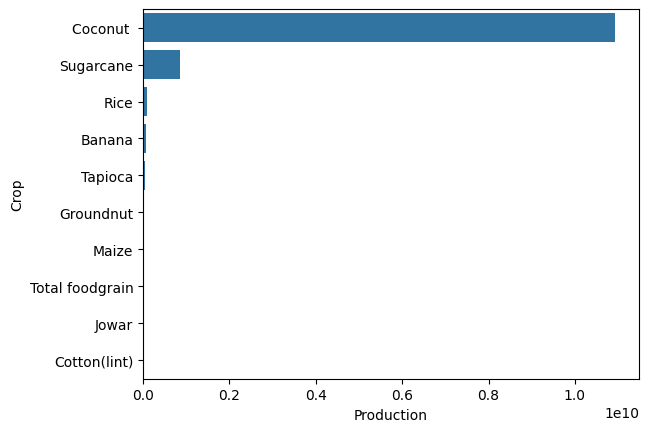

In [66]:
sns.barplot(data=top_p,y='Crop',x='Production')



---

**Rice has the highest production so it is analyzed further**

In [75]:
rice_p = data[data['Crop'] == 'Rice']

In [76]:
rice_p

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00


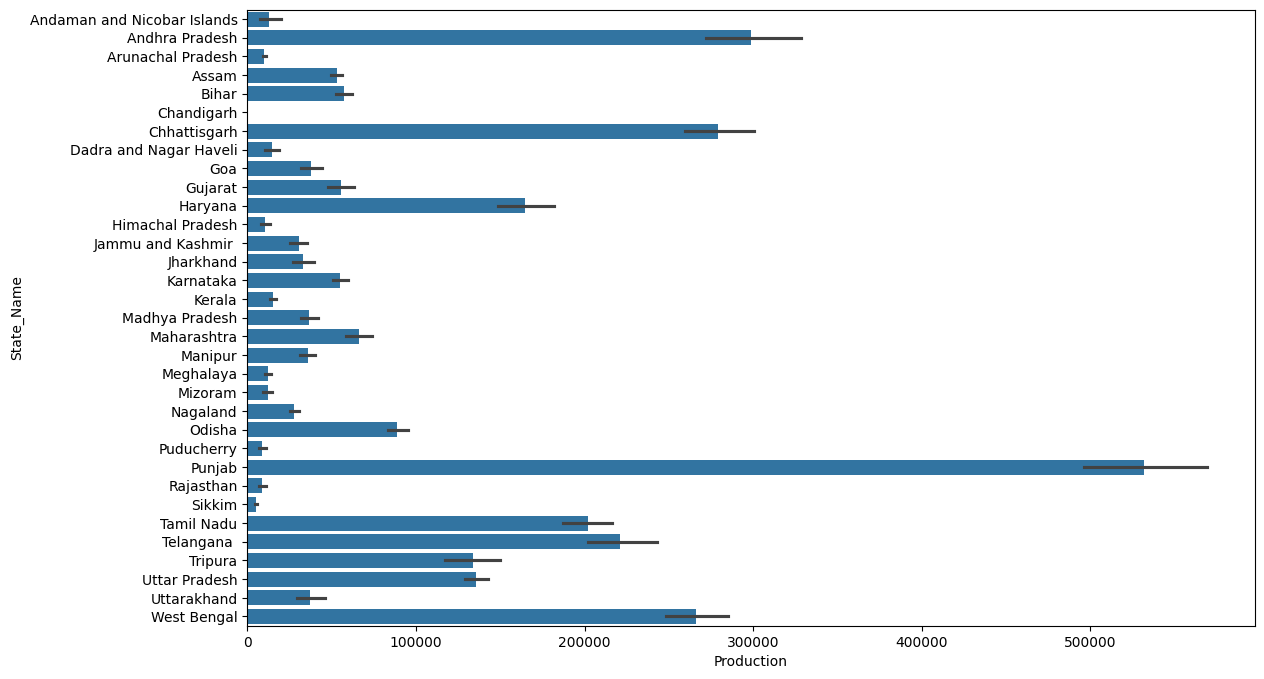

In [83]:
plt.figure(figsize=(13,8))
sns.barplot(data=rice_p,x='Production',y='State_Name');

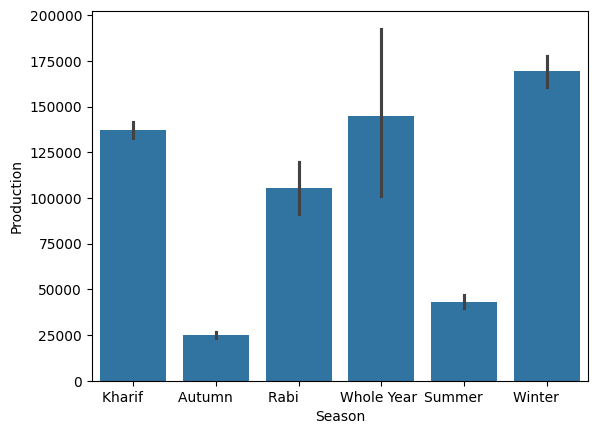

In [84]:
sns.barplot(data=rice_p,x='Season',y='Production');



---
**Analyzing the last 4 years Production by considering the Crop and Year attributes**


In [90]:
top_data = data.sort_values(by='State_Name', ascending=False)

In [124]:
crops_analysis = list(top_data[:20]['Crop'].values)
crops_analysis

['Sesamum',
 'Khesari',
 'Urad',
 'Sannhamp',
 'Other Kharif pulses',
 'Niger seed',
 'Mesta',
 'Jute',
 'Horse-gram',
 'Bajra',
 'Small millets',
 'Sesamum',
 'Rice',
 'Maize',
 'Groundnut',
 'Sesamum',
 'Rice',
 'Groundnut',
 'Linseed',
 'Maize']

In [98]:
Year= list(data['Crop_Year'].unique())
Year

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2010,
 1997,
 1998,
 1999,
 2007,
 2008,
 2009,
 2011,
 2012,
 2013,
 2014,
 2015]

In [125]:
y_analy = Year[-4:]
y_analy

[2012, 2013, 2014, 2015]

In [123]:
states = list(data['State_Name'].unique())
states

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir ',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana ',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [128]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=len(crops_analysis ), cols=len(y_analy),
    subplot_titles=[f'{crop} - {year}' for crop in crops_analysis  for year in y_analy],
    shared_yaxes=True
)

for i, crop in enumerate(crops_analysis ):
    for j, year in enumerate(y_analy):
        state_pro_dict = {}

        for state in states:
            subset = data[(data['Crop'] == crop) & (data['Crop_Year'] == year) & (data['State_Name'] == state)]
            production_sum = subset['Production'].sum()
            state_pro_dict[state] = production_sum

        sorted_states = sorted(state_pro_dict, key=lambda k: state_pro_dict[k], reverse=True)
        sorted_pro = [state_pro_dict[state] for state in sorted_states]

        fig.add_trace(go.Bar(x=sorted_states, y=sorted_pro, name=f'{crop} - {year}'), row=i+1, col=j+1)

fig_height = 300 * len(crops_analysis )
fig.update_layout(title='Production Analysis by Crop and Year', height=fig_height, width=1000, showlegend=False)

for i in range(len(crops_analysis )):
    for j in range(len(y_analy)):
        fig.update_xaxes(row=i+1, col=j+1, tickangle=90)
fig.update_yaxes(title_text='Production', row=1, col=1)

fig.show()